In [1]:
# Load all libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
import xesmf as xe
import cartopy

# TREFHT

In [2]:
# Find the TREFHT files in the historical data

files_hist_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.*.TREFHT.192001-200512.nc')
files_hist = files_hist_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
# Eject 001 - includes 1850-1920
#files_hist.remove('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc')
print(files_hist)
print(len(files_hist))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/c

In [3]:
# Process the datasets

historical = xr.open_mfdataset(files_hist,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
historical.load()

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, nbnd: 2, cosp_tau: 7, cosp_scol: 10,
                          cosp_ht: 40, cosp_sr: 15, cosp_sza: 5,
                          cosp_htmisr: 16, cosp_tau_modis: 6, ensemble_mem: 34,
                          time: 1032, lat: 192, lon: 288, ilev: 31, lev: 30,
                          slat: 191, slon: 288)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 1e+03 800.0 ... 180.0 0.0
    cosp_tau_bnds        (cosp_tau, nbnd) float64 0.0 0.3 0.3 ... 60.0 379.0
    cosp_ht_bnds         (cosp_ht, nbnd) float64 0.0 480.0 ... 1.92e+04
    cosp_sr_bnds         (cosp_sr, nbnd) float64 0.01 1.2 ... 999.0 1.009e+03
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 -99.0 0.0 0.0 ... 17.0 99.0
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 0.3 1.3 ... 60.0 1e+05
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 -1.0 -1.0 ... -1.0 -1.0
    time_bnds            (ensemble_mem, time, nbnd) object 1920-01-01 00:00:0...
    time_written         (ensemble_mem, time) |S8 b'16:46:47' ... b'05:42:37'
    w_stag               (ensemble_mem, slat) float64 0.0001353 ... 0.0001353
    wnummax              (ensemble_mem, lat) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.004
    title:                     UNSET
    logname:                   mai
    host:                      ys4731
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/...
    history:                   Wed Sep 11 21:14:41 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [4]:
historical.TREFHT

<xarray.DataArray 'TREFHT' (ensemble_mem: 34, time: 1032, lat: 192, lon: 288)>
array([[[[242.68951, 243.17696, 243.20062, ..., 243.14426, 242.67989,
          243.22049],
         [243.51468, 243.57176, 243.47205, ..., 242.8779 , 243.24431,
          243.19226],
         [244.32883, 244.40083, 244.33205, ..., 244.2432 , 244.38733,
          244.23317],
         ...,
         [234.57556, 234.58955, 234.60469, ..., 234.54541, 234.55542,
          234.5653 ],
         [234.4455 , 234.45857, 234.4723 , ..., 234.40402, 234.41797,
          234.43195],
         [234.30513, 234.3058 , 234.3064 , ..., 234.30272, 234.3036 ,
          234.30441]],

        [[234.97469, 235.24059, 235.25792, ..., 235.23256, 234.97394,
          235.27008],
         [235.60124, 235.63339, 235.5949 , ..., 235.19598, 235.39635,
          235.37567],
         [235.85866, 235.90483, 235.8762 , ..., 235.73904, 235.8584 ,
          235.75928],
...
         [243.29526, 243.34616, 243.39569, ..., 243.1638 , 243.20683,
          243.24863],
         [242.86197, 242.8876 , 242.91411, ..., 242.7802 , 242.80678,
          242.83481],
         [242.25279, 242.25497, 242.25696, ..., 242.24484, 242.24776,
          242.2504 ]],

        [[239.59848, 239.9896 , 240.00568, ..., 239.96439, 239.58583,
          240.01936],
         [239.73262, 239.77235, 240.33481, ..., 239.60286, 239.63475,
          239.60225],
         [240.70737, 240.65932, 240.64041, ..., 240.6984 , 240.77245,
          240.76993],
         ...,
         [242.8741 , 242.8872 , 242.8978 , ..., 242.82378, 242.84094,
          242.85704],
         [242.84839, 242.85028, 242.85222, ..., 242.83829, 242.84335,
          242.84624],
         [242.80042, 242.80052, 242.80058, ..., 242.80013, 242.80023,
          242.80035]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: ensemble_mem
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [8]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)
#new_time_index=pd.date_range(start='1920-02-16',freq='M', periods=1032)

historical_reinterp = historical.TREFHT.interp(lat=new_lats, lon=new_lons)
#historical_newtime = historical_reinterp.assign_coords(time=new_time_index)
historical_reinterp

<xarray.DataArray 'TREFHT' (ensemble_mem: 34, time: 1032, lat: 88, lon: 179)>
array([[[[244.43557404, 244.37482615, 244.05830739, ..., 245.5068455 ,
          245.41160965, 245.11690104],
         [245.67617993, 245.47235981, 245.0377672 , ..., 246.99279285,
          246.76581785, 246.27817196],
         [248.08215469, 247.84964247, 247.58945533, ..., 248.85285151,
          248.66233699, 248.63092309],
         ...,
         [235.87069712, 236.23570618, 236.57532238, ..., 234.43545437,
          234.70775452, 235.071127  ],
         [234.80938322, 234.99237061, 235.14769491, ..., 234.18295102,
          234.33137724, 234.49590607],
         [234.44232213, 234.50941757, 234.57989934, ..., 234.15987971,
          234.21734619, 234.30089773]],

        [[235.48910039, 235.37614634, 235.15707347, ..., 236.52134766,
          236.32907232, 236.03021515],
         [235.31870821, 234.97176124, 234.52002504, ..., 237.06824977,
          236.68790181, 236.17015906],
         [236.03032849, 235.84291914, 235.68780187, ..., 236.46885001,
          236.34382155, 236.30531235],
...
         [245.92251124, 246.36336266, 246.91492013, ..., 244.30573461,
          244.63462567, 245.06057049],
         [244.04127782, 244.33837314, 244.61061732, ..., 243.18310081,
          243.40444353, 243.58043332],
         [243.63032338, 243.7490566 , 243.88179677, ..., 243.07990504,
          243.22954432, 243.39418569]],

        [[240.82976781, 240.65034251, 240.49900462, ..., 241.54883591,
          241.33143641, 241.23251444],
         [241.41406428, 241.42148505, 241.1725769 , ..., 243.09725401,
          242.79364734, 242.36083815],
         [244.1528948 , 243.78676131, 243.29898012, ..., 245.33645533,
          245.14108666, 244.87813833],
         ...,
         [245.26617974, 245.58271666, 245.89642037, ..., 243.86944953,
          244.27939343, 244.66254372],
         [243.27592061, 243.43276579, 243.54991277, ..., 242.56615618,
          242.7736312 , 242.93682488],
         [242.9230781 , 242.97965083, 243.0316508 , ..., 242.56193085,
          242.66233368, 242.77681936]]]])
Coordinates:
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: ensemble_mem
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [9]:
historical_reinterp.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_TAS.nc')

In [25]:
historical_reinterp = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_TAS.nc')

In [26]:
historical_reinterp

<xarray.DataArray 'TREFHT' (ensemble_mem: 34, time: 1032, lat: 88, lon: 179)>
[552706176 values with dtype=float64]
Coordinates:
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: ensemble_mem
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

# SST

## Historical

In [3]:
# Find the TREFHT files in the historical data

files_hist_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.*.SST.192001-200512.nc')
files_hist = files_hist_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
# Eject 001 - includes 1850-1920
#files_hist.remove('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc')
print(files_hist)
print(len(files_hist))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.010.pop.h.SST.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20T

In [4]:
# Process the datasets

historical_sst = xr.open_mfdataset(files_hist,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
historical_sst.load()

<xarray.Dataset>
Dimensions:               (ensemble_mem: 34, nlat: 384, nlon: 320, z_t: 1,
                           z_w: 60, lat_aux_grid: 395, moc_comp: 3, moc_z: 61,
                           time: 1032, d2: 2, transport_comp: 5,
                           transport_reg: 2, z_t_150m: 15, z_w_bot: 60,
                           z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
    TLONG                 (nlat, nlon) float64 320.6 321.7 322.8 ... 319.4 319.8
    ULAT                  (nlat, nlon) float64 -78.95 -78.95 ... 72.41 72.41
    ULONG                 (nlat, nlon) float64 321.1 322.3 323.4 ... 319.6 320.0
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * time                  (time) object 1920-02-01 00:00:00 ... 2006-01-01 00...
  * z_t                   (z_t) float32 500.0
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: ensemble_mem, nlat, nlon, moc_comp, d2,
                                transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (ensemble_mem, nlat, nlon) float64 0.0 ... 2.804e-07
    ANGLET                (ensemble_mem, nlat, nlon) float64 0.0 ... -0.01268
    DXT                   (ensemble_mem, nlat, nlon) float64 1.894e+06 ... 1....
    DXU                   (ensemble_mem, nlat, nlon) float64 2.397e+06 ... 1....
    DYT                   (ensemble_mem, nlat, nlon) float64 5.94e+06 ... 5.0...
    DYU                   (ensemble_mem, nlat, nlon) float64 5.94e+06 ... 5.4...
    ...                    ...
    stefan_boltzmann      (ensemble_mem) float64 5.67e-08 5.67e-08 ... 5.67e-08
    time_bound            (ensemble_mem, time, d2) object 1920-01-02 00:59:59...
    transport_components  (ensemble_mem, transport_comp) |S256 b'Total' ... b...
    transport_regions     (ensemble_mem, transport_reg) |S256 b'Global Ocean ...
    vonkar                (ensemble_mem) float64 0.4 0.4 0.4 0.4 ... 0.4 0.4 0.4
    SST                   (ensemble_mem, time, z_t, nlat, nlon) float32 nan ....
Attributes: (12/14)
    title:                     b.e11.B20TRC5CNBDRD.f09_g16.004
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy...
    calendar:                  All years have exactly  365 days.
    ...                        ...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    NCO:                       4.3.4
    nco_openmp_thread_number:  1
    history:                   Wed Nov 13 13:18:32 2013: ncrename -v TEMP,SST...

In [4]:
historical_sst.SST

<xarray.DataArray 'SST' (ensemble_mem: 34, time: 1032, z_t: 1, nlat: 384,
                         nlon: 320)>
array([[[[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [ 0.3976582 ,  0.54483336,  0.6658507 , ...,         nan,
                   nan,         nan],
          ...,
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [ 0.13513339,  0.2150759 ,  0.29105246, ...,         nan,
...
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [-1.34394   , -1.2613819 , -1.2017367 , ...,         nan,
                   nan,         nan],
          ...,
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan]]]]], dtype=float32)
Coordinates:
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * z_t      (z_t) float32 500.0
Dimensions without coordinates: ensemble_mem, nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

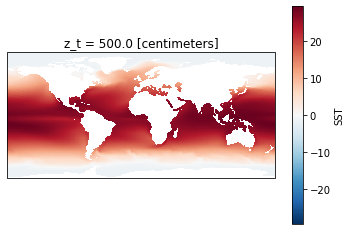

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())
historical_sst.SST.mean('time').mean('ensemble_mem').plot(ax=ax, x='TLONG', y='TLAT')

In [16]:
historical_sst.SST.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_SST.nc')

In [5]:
#https://gist.github.com/bradyrx/aee079f8494b084a5c56f7eaf83c8cef


# target grid is 1x1 degree rectilinear
ds_out = xe.util.grid_global(2, 2)
ds_out

<xarray.Dataset>
Dimensions:  (y: 90, x: 180, y_b: 91, x_b: 181)
Coordinates:
    lon      (y, x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    lat      (y, x) float64 -89.0 -89.0 -89.0 -89.0 ... 89.0 89.0 89.0 89.0
    lon_b    (y_b, x_b) float64 -180.0 -178.0 -176.0 ... 176.0 178.0 180.0
    lat_b    (y_b, x_b) float64 -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0 90.0
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    *empty*

In [6]:
hist_sst_sq = historical_sst['SST'].squeeze()
hist_sst_sq = hist_sst_sq.to_dataset()
hist_sst_sq

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 1032, ensemble_mem: 34)
Coordinates:
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
    z_t      float32 500.0
Dimensions without coordinates: nlat, nlon, ensemble_mem
Data variables:
    SST      (ensemble_mem, time, nlat, nlon) float32 nan nan nan ... nan nan

In [7]:
hist_sst_sq = hist_sst_sq.rename({'TLAT':'lat', 'TLONG': 'lon'})
hist_sst_sq

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 1032, ensemble_mem: 34)
Coordinates:
    lat      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
    z_t      float32 500.0
Dimensions without coordinates: nlat, nlon, ensemble_mem
Data variables:
    SST      (ensemble_mem, time, nlat, nlon) float32 nan nan nan ... nan nan

In [8]:
regridder = xe.Regridder(hist_sst_sq, ds_out, 'bilinear', periodic=True)
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_384x320_90x180_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (384, 320) 
Output grid shape:          (90, 180) 
Periodic in longitude?      True

In [9]:
dr_out = regridder(hist_sst_sq)

In [45]:
dr_out

<xarray.Dataset>
Dimensions:  (ensemble_mem: 34, time: 1032, y: 90, x: 180)
Coordinates:
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
    z_t      float32 500.0
    lat      (y, x) float64 -89.0 -89.0 -89.0 -89.0 ... 89.0 89.0 89.0 89.0
    lon      (y, x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
Dimensions without coordinates: ensemble_mem, y, x
Data variables:
    SST      (ensemble_mem, time, y, x) float32 0.0 0.0 0.0 ... -1.801 -1.801
Attributes:
    regrid_method:  bilinear

In [11]:
sst_hist = dr_out.rename({'x':'lon', 'y':'lat'})

new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)
#new_time_index=pd.date_range(start='1920-02-16',freq='M', periods=1032)

sst_hist = sst_hist.drop_vars('lat')
sst_hist = sst_hist.drop_vars('lon')

sst_hist.coords['lon'] = np.arange(1,360,2)
sst_hist.coords['lat'] = np.arange(-90,90,2)
sst_hist_interp = sst_hist.interp(lat=new_lats, lon=new_lons)

In [13]:
sst_hist_interp

<xarray.Dataset>
Dimensions:  (ensemble_mem: 34, time: 1032, lat: 88, lon: 179)
Coordinates:
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
    z_t      float32 500.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: ensemble_mem
Data variables:
    SST      (ensemble_mem, time, lat, lon) float64 nan nan ... -1.801 -1.801
Attributes:
    regrid_method:  bilinear

In [14]:
sst_hist_interp.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_SST_hist_2x2.nc')

In [56]:
sst_hist = sst_hist['SST']

In [ ]:
sst_hist = sst_hist.drop_vars('lat')

In [63]:
sst_hist = sst_hist.drop_vars('lon')

In [66]:
sst_hist

<xarray.DataArray 'SST' (ensemble_mem: 34, time: 1032, lat: 90, lon: 180)>
array([[[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [-1.7996984, -1.7997301, -1.7997789, ..., -1.799594 ,
          -1.7996453, -1.7996852],
         [-1.7999716, -1.7998801, -1.7997935, ..., -1.800293 ,
          -1.800195 , -1.8000813],
         [-1.7999542, -1.7999337, -1.7999136, ..., -1.8000598,
          -1.8000205, -1.7999822]],

        [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
...
         [-1.8018001, -1.8017802, -1.8017408, ..., -1.8017797,
          -1.801788 , -1.8017933],
         [-1.8026226, -1.8025073, -1.8023889, ..., -1.8029054,
          -1.8028297, -1.80273  ],
         [-1.803981 , -1.8039607, -1.8039417, ..., -1.8039393,
          -1.8039603, -1.8039825]],

        [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [-1.8002936, -1.8001857, -1.8001089, ..., -1.8006079,
          -1.8005084, -1.8004065],
         [-1.800676 , -1.8007271, -1.8007864, ..., -1.8005129,
          -1.8005598, -1.8006167],
         [-1.8007108, -1.8007413, -1.8007723, ..., -1.8006388,
          -1.8006608, -1.8006837]]]], dtype=float32)
Coordinates:
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
    z_t      float32 500.0
Dimensions without coordinates: ensemble_mem, lat, lon

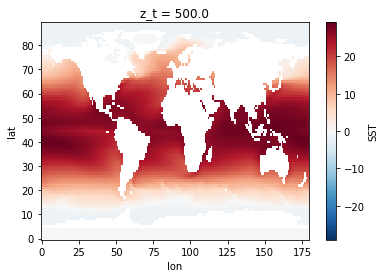

In [67]:
sst_hist.mean('ensemble_mem').mean('time').plot()

In [68]:
sst_hist.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_SST_reinterp.nc')

## Control

In [15]:
# Find the TREFHT files in the historical data

files_control_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.*.SST.*.nc')
files_control = files_control_complete #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
# Eject 001 - includes 1850-1920
#files_hist.remove('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc')
print(files_control)
print(len(files_control))

['/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.040001-049912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.050001-059912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.060001-069912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.070001-079912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.080001-089912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.090001-099912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.100001-109912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.110001-119912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.pop.h.SST.120001-129912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.

In [16]:
# Process the datasets

control_sst = xr.open_mfdataset(files_control,combine="by_coords",use_cftime=True)

In [17]:
#https://gist.github.com/bradyrx/aee079f8494b084a5c56f7eaf83c8cef


# target grid is 1x1 degree rectilinear
ds_out = xe.util.grid_global(2, 2)
ds_out

cont_sst_sq = control_sst['SST'].squeeze()
cont_sst_sq = cont_sst_sq.to_dataset()
cont_sst_sq

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 21612)
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
    z_t      float32 500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    SST      (time, nlat, nlon) float32 dask.array<chunksize=(1200, 384, 320), meta=np.ndarray>

In [18]:
cont_sst_sq = cont_sst_sq.rename({'TLAT':'lat', 'TLONG': 'lon'})
cont_sst_sq

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 21612)
Coordinates:
    lat      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
    z_t      float32 500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    SST      (time, nlat, nlon) float32 dask.array<chunksize=(1200, 384, 320), meta=np.ndarray>

In [19]:
regridder = xe.Regridder(cont_sst_sq, ds_out, 'bilinear', periodic=True)
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_384x320_90x180_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (384, 320) 
Output grid shape:          (90, 180) 
Periodic in longitude?      True

In [21]:
dr_out = regridder(cont_sst_sq)

sst_cont = dr_out.rename({'x':'lon', 'y':'lat'})
sst_cont = sst_cont['SST']
sst_cont = sst_cont.drop_vars('lat')
sst_cont = sst_cont.drop_vars('lon')

new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

sst_cont.coords['lon'] = np.arange(1,360,2)
sst_cont.coords['lat'] = np.arange(-90,90,2)
sst_cont_interp = sst_cont.interp(lat=new_lats, lon=new_lons)

In [22]:
sst_cont_interp

<xarray.DataArray 'SST' (time: 21612, lat: 88, lon: 179)>
dask.array<dask_aware_interpnd, shape=(21612, 88, 179), dtype=float32, chunksize=(1212, 88, 179), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
    z_t      float32 500.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [23]:
sst_cont_interp.load()

<xarray.DataArray 'SST' (time: 21612, lat: 88, lon: 179)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.80050749, -1.80043006, -1.80040836, ..., -1.80080158,
         -1.80078936, -1.80069035],
        [-1.80060232, -1.80061692, -1.80063146, ..., -1.80055898,
         -1.80056751, -1.80057758],
        [-1.80032802, -1.80037093, -1.80041343, ..., -1.8002243 ,
         -1.80024874, -1.80027312]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-1.79989004, -1.79968405, -1.79948163, ..., -1.80042201,
         -1.80031747, -1.80021733],
        [-1.79986614, -1.7997154 , -1.79956448, ..., -1.80015391,
         -1.80010974, -1.80005383],
        [-1.79960334, -1.79955178, -1.79950058, ..., -1.79965359,
         -1.79965812, -1.79965055]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.80312818, -1.80321383, -1.8032428 , ..., -1.80250788,
         -1.8026365 , -1.80282015],
        [-1.80268466, -1.8028037 , -1.80290055, ..., -1.802212  ,
         -1.80232811, -1.8024441 ],
        [-1.80156368, -1.80159944, -1.80162877, ..., -1.8014192 ,
         -1.80145812, -1.80149502]]])
Coordinates:
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
    z_t      float32 500.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [24]:
sst_cont_interp.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_SST_piControl_2x2.nc')

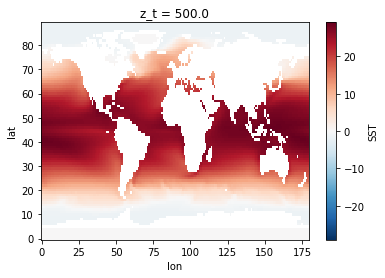

In [15]:
sst_cont.mean('time').plot()

# TS

## Control

In [2]:
# Find the TS files in the historical data

files_control_TS = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.*.TS.*.nc')
# Eject 001 - includes 1850-1920
#files_hist.remove('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc')
print(files_control_TS)
print(len(files_control_TS))

['/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.040001-049912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.050001-059912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.060001-069912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.070001-079912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.080001-089912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.090001-099912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.100001-109912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.110001-119912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TS.120001-129912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.

In [3]:
control_ts = xr.open_mfdataset(files_control_TS,combine="by_coords",use_cftime=True)
control_ts

<xarray.Dataset>
Dimensions:       (time: 21612, lat: 192, lon: 288, ilev: 31, lev: 30,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    TS            (time, lat, lon) float32 dask.array<chunksize=(1200, 192, 288), meta=np.ndarray>
    ch4vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    date          (time) int32 dask.array<chunksize=(1200,), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    ...            ...
    ntrn          (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    sol_tsi       (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    w_stag        (time, slat) float64 dask.array<chunksize=(1200, 191), meta=np.ndarray>
    wnummax       (time, lat) int32 dask.array<chunksize=(1200, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:54 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [5]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

control_ts_interp = control_ts.interp(lat=new_lats, lon=new_lons)
control_ts_interp.TS

<xarray.DataArray 'TS' (time: 21612, lat: 88, lon: 179)>
dask.array<dask_aware_interpnd, shape=(21612, 88, 179), dtype=float32, chunksize=(1212, 88, 179), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [6]:
control_ts_interp.TS.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_TS_piControl.nc')

# Omega500

## Control

In [7]:
files_control_OMEGA = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.*.OMEGA.*.nc')
print(files_control_OMEGA)
print(len(files_control_OMEGA))

['/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.OMEGA.210001-220012.nc']
1


In [8]:
control_omega = xr.open_mfdataset(files_control_OMEGA,combine="by_coords",use_cftime=True)
control_omega

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, time: 1212, lat: 192, lon: 288,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 2100-02-01 00:00:00 ... 2201-01-01 00:00:00
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
Dimensions without coordinates: nbnd
Data variables: (12/32)
    hyam          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybm          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hyai          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybi          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    P0            float64 ...
    date          (time) int32 dask.array<chunksize=(1212,), meta=np.ndarray>
    ...            ...
    n2ovmr        (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    f11vmr        (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    f12vmr        (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    sol_tsi       (time) float64 dask.array<chunksize=(1212,), meta=np.ndarray>
    nsteph        (time) int32 dask.array<chunksize=(1212,), meta=np.ndarray>
    OMEGA         (time, lev, lat, lon) float32 dask.array<chunksize=(1212, 30, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B1850C5CN.f09_g16.005
    title:            UNSET
    logname:          mai
    host:             ys0752
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/cami-mam3...
    topography_file:  /glade/p/cesm/cseg//inputdata/atm/cam/topo/USGS-gtopo30...

In [9]:
omega_cont_500 = control_omega['OMEGA'].sel(lev=524.687175, method='nearest')

new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)
#new_time_index=pd.date_range(start='1920-02-16',freq='M', periods=1032)

omega_reinterp = omega_cont_500.interp(lat=new_lats, lon=new_lons)

omega_cont_averaged = omega_reinterp.mean('time')

omega_cont_averaged.load()

<xarray.DataArray 'OMEGA' (lat: 88, lon: 179)>
array([[ 0.01340513,  0.01320695,  0.01297021, ...,  0.01406088,
         0.01390221,  0.0137369 ],
       [ 0.01735752,  0.01745341,  0.01747349, ...,  0.01601475,
         0.0164608 ,  0.01685281],
       [ 0.01202139,  0.01506044,  0.01736867, ...,  0.00996497,
         0.00675799,  0.00684728],
       ...,
       [-0.00488225, -0.00355881, -0.0024294 , ..., -0.00478609,
        -0.00632663, -0.00664843],
       [-0.00278465, -0.0026194 , -0.0024343 , ..., -0.00307728,
        -0.00304576, -0.00299001],
       [-0.00256477, -0.00254047, -0.00251033, ..., -0.00260211,
        -0.00260144, -0.00259468]], dtype=float32)
Coordinates:
    lev      float64 524.7
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [10]:
omega_cont_averaged.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_omega500_piControl.nc')

# Land Mask

In [3]:
files_control_LANDFRAC = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.*.LANDFRAC.*.nc')
print(files_control_LANDFRAC)
print(len(files_control_LANDFRAC))

['/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.LANDFRAC.130001-139912.nc']
1


In [4]:
control_landfrac = xr.open_mfdataset(files_control_LANDFRAC,combine="by_coords",use_cftime=True)
control_landfrac

<xarray.Dataset>
Dimensions:       (time: 1200, lat: 192, lon: 288, ilev: 31, lev: 30,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 1300-02-01 00:00:00 ... 1400-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    LANDFRAC      (time, lat, lon) float32 dask.array<chunksize=(1200, 192, 288), meta=np.ndarray>
    P0            float64 ...
    ch4vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    date          (time) int32 dask.array<chunksize=(1200,), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    ...            ...
    ntrn          int32 ...
    sol_tsi       (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    w_stag        (slat) float64 dask.array<chunksize=(191,), meta=np.ndarray>
    wnummax       (lat) int32 dask.array<chunksize=(192,), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0302
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Wed Nov  6 16:35:26 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [6]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

control_landfrac_interp = control_landfrac.interp(lat=new_lats, lon=new_lons)
control_landfrac_interp.LANDFRAC

<xarray.DataArray 'LANDFRAC' (time: 1200, lat: 88, lon: 179)>
dask.array<dask_aware_interpnd, shape=(1200, 88, 179), dtype=float32, chunksize=(1200, 88, 179), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1300-02-01 00:00:00 ... 1400-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    units:         fraction
    long_name:     Fraction of sfc area covered by land
    cell_methods:  time: mean

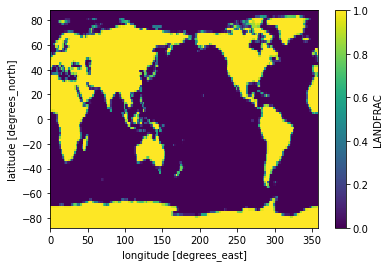

In [7]:
control_landfrac_interp.LANDFRAC.mean('time').plot()

In [8]:
landfrac_mean = control_landfrac_interp.LANDFRAC.mean('time')

In [9]:
landfrac_mean.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM_LANDFRAC.nc')

# Testing

In [6]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)
#new_time_index=pd.date_range(start='1920-02-16',freq='M', periods=1032)

historical_reinterp = historical_sst.SST.interp(nlat=new_lats, nlon=new_lons)
#historical_newtime = historical_reinterp.assign_coords(time=new_time_index)
historical_reinterp

<xarray.DataArray 'SST' (ensemble_mem: 34, time: 1032, z_t: 1, nlat: 88,
                         nlon: 179)>
array([[[[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [20.24255371, 20.10749245, 19.89260101, ...,         nan,
                   nan,         nan],
          [20.89226151, 20.70049667, 20.51460266, ...,         nan,
                   nan,         nan],
          [21.52478027, 21.35187721, 21.28418541, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
...
                   nan,         nan],
          [17.10009384, 17.07806778, 17.13239288, ...,         nan,
                   nan,         nan],
          [17.84052467, 17.94984818, 17.99720001, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [18.68684196, 18.74132919, 18.68729973, ...,         nan,
                   nan,         nan],
          [19.41566086, 19.45721436, 19.31527328, ...,         nan,
                   nan,         nan],
          [20.20547104, 20.12958908, 19.92385674, ...,         nan,
                   nan,         nan]]]]])
Coordinates:
    TLAT     (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
    TLONG    (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ULAT     (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ULONG    (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * z_t      (z_t) float32 500.0
  * nlat     (nlat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * nlon     (nlon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: ensemble_mem
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

In [8]:
historical_reinterp

<xarray.DataArray 'SST' (ensemble_mem: 34, time: 1032, z_t: 1, nlat: 88,
                         nlon: 179)>
array([[[[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [20.24255371, 20.10749245, 19.89260101, ...,         nan,
                   nan,         nan],
          [20.89226151, 20.70049667, 20.51460266, ...,         nan,
                   nan,         nan],
          [21.52478027, 21.35187721, 21.28418541, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
...
                   nan,         nan],
          [17.10009384, 17.07806778, 17.13239288, ...,         nan,
                   nan,         nan],
          [17.84052467, 17.94984818, 17.99720001, ...,         nan,
                   nan,         nan]]],


        [[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [18.68684196, 18.74132919, 18.68729973, ...,         nan,
                   nan,         nan],
          [19.41566086, 19.45721436, 19.31527328, ...,         nan,
                   nan,         nan],
          [20.20547104, 20.12958908, 19.92385674, ...,         nan,
                   nan,         nan]]]]])
Coordinates:
    TLAT     (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
    TLONG    (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ULAT     (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ULONG    (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan nan
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * z_t      (z_t) float32 500.0
  * nlat     (nlat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * nlon     (nlon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: ensemble_mem
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

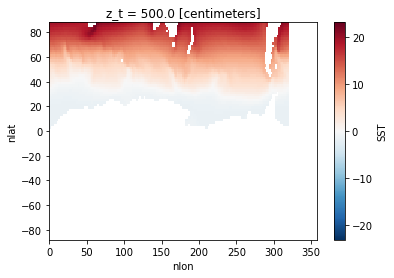

In [11]:
historical_reinterp.mean('time').mean('ensemble_mem').isel(z_t=0).plot()